In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full) , (X_test,y_test) = fashion_mnist.load_data()

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
oneInst = X_train_full[1]
print(oneInst.shape)

(28, 28)


In [ ]:
X_valid,X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid,y_train = y_train_full[:5000] , y_train_full[5000:]

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names[y_train_full[1]]

'T-shirt/top'

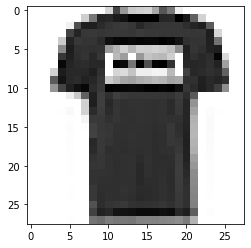

In [ ]:
plt.imshow(X_train_full[1].reshape((28,28)),cmap='binary')

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])


In [ ]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7132 - accuracy: 0.7679 - val_loss: 0.5326 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4886 - accuracy: 0.8297 - val_loss: 0.4592 - val_accuracy: 0.8424
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4414 - accuracy: 0.8458 - val_loss: 0.4188 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4150 - accuracy: 0.8546 - val_loss: 0.4142 - val_accuracy: 0.8574
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8614 - val_loss: 0.3813 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3781 - accuracy: 0.8679 - val_loss: 0.4025 - val_accuracy: 0.8606
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3643 - accuracy: 0.8703 - val_loss: 0.3692 - val_accuracy:

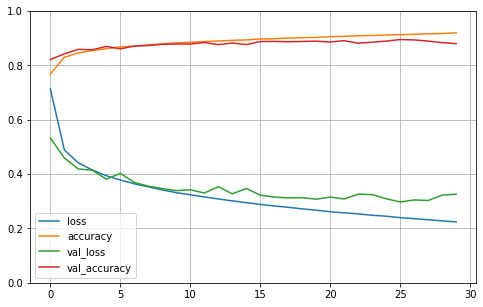

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 73.6390 - accuracy: 0.8350


[73.63898468017578, 0.8349999785423279]

In [ ]:
X_new = X_test[5:10]
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 18ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([1, 4, 6, 5, 7])

In [ ]:
np.array(class_names)[y_pred]

array(['Trouser', 'coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

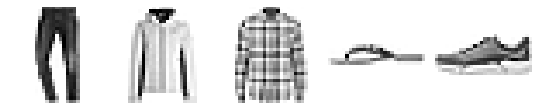

In [ ]:
plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(5,10,i+1)
    plt.imshow(X_new[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
plt.tight_layout()
plt.show()